## AEROFIT -  Exploratory Data Analysis

### Problem Statement

Aerofit is India's leading fitness equipment brand that manufactures residential and commercial fitness machines including treadmills, elliptical trainers etc. Fitness accessories is the best way to engage in your daily fitness workouts, and to get the maximum out of it. It help you to be comfortable while exercising and improve the effectiveness of your workout.  In this EDA, we will find out how good is the product used by different age , gender , Incomed persons. Also , this EDA will helpful to find out the usage of different products mentioned in data set

### Following data analysis have been made in this notebook¶
1. Male Vs Female usage
2. Outliers for Age, Education , Income , Miles
3. Genderwise Product usage
4. Maritalstatus wise Product usage
5. usage of different products in dataset
6. Correlelation of different categories- age, gender, maritalstatus, income range
7. Probability of male and female usage of Products 
8. Probability of products used by maritalstatus - single and partnered

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import ipywidgets as w
from IPython.display import display

In [32]:
df=pd.read_csv("aerofit_treadmill.csv")

### Finding dataset info

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [34]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [35]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Checking if ,there is any null values in data set

In [36]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [37]:
# total male and female ratio

### Category wise data analysis

In [38]:
male_count=df[df['Gender']=='Male']
male_count=male_count.drop_duplicates(keep='last')
male_count= male_count.value_counts().value_counts()[1]

In [39]:
male_count

104

In [40]:
female_count=df[df['Gender']=='Female']
female_count=female_count.drop_duplicates(keep='last')
female_count= female_count.value_counts().value_counts()[1]

In [41]:
female_count

76

In [42]:
df_analysis = df[['Product', 'Gender', 'MaritalStatus']].melt()
df_analysis.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

#### Insight:
44% customers - purchased KP2821 product
33% customers - purchased KP481 product
22% customers - purchased KP781 product

## Data Visualisation

## Male vs Female usage of Treadmill

In [43]:
#Category wise Usage 
data_dict1 = {'Usage':[df[df['Gender']=='Male']['Usage'].sum(), df[df['Gender']=='Female']['Usage'].sum()], 'Gender': ['Male','Female']}
df_b = pd.DataFrame(data=data_dict1, columns=['Gender','Usage'])
px.bar(data_frame=df_b, x="Gender", y="Usage", color="Gender", barmode="group",title="Genderwise Usage of Treadmill in hours")


### Analysing data for parameters like Age, Education, Usage, Fitness

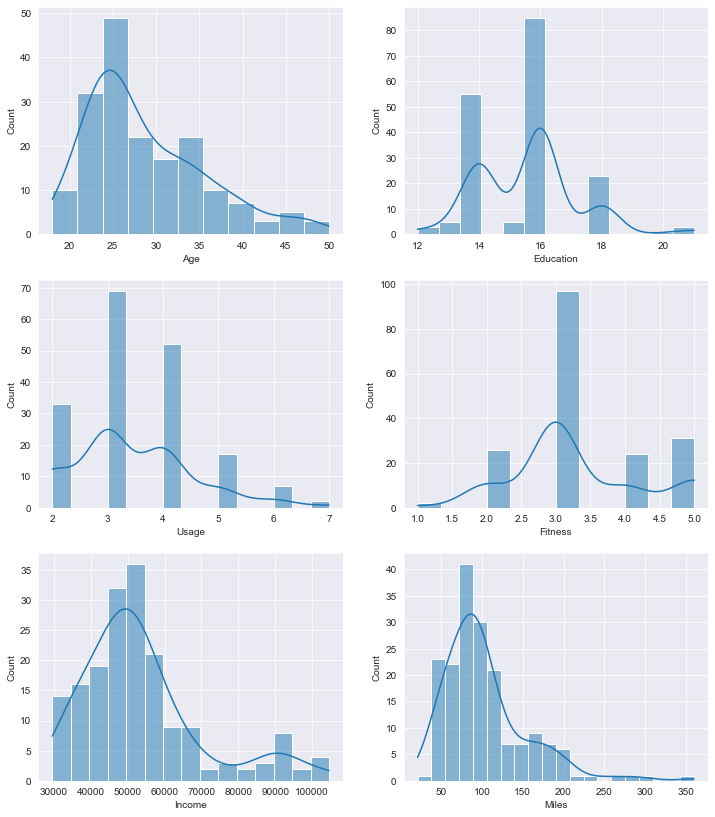

In [44]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df, x="Miles", kde=True, ax=axis[2,1])
plt.show()

### Finding Outliers of Age , Education , Income, Miles

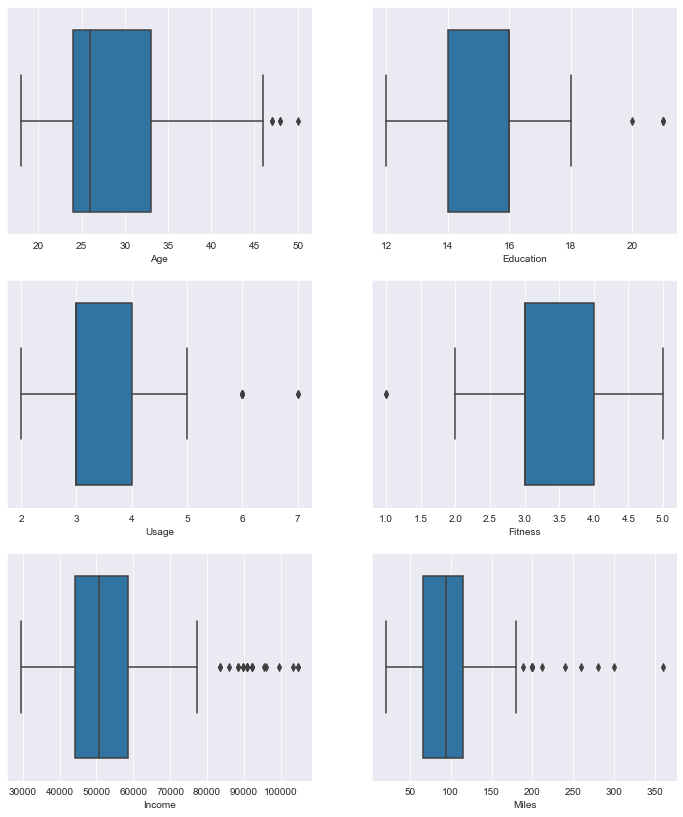

In [45]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()

#### Insights:
Age, Education , Usage are having few outliers.
 Income and Miles are having more outliers. 
 So we can use Age, Education ,Usage as our main parameters in data analysis

### Comparison between Product and Gender, Product and Maritalstatus

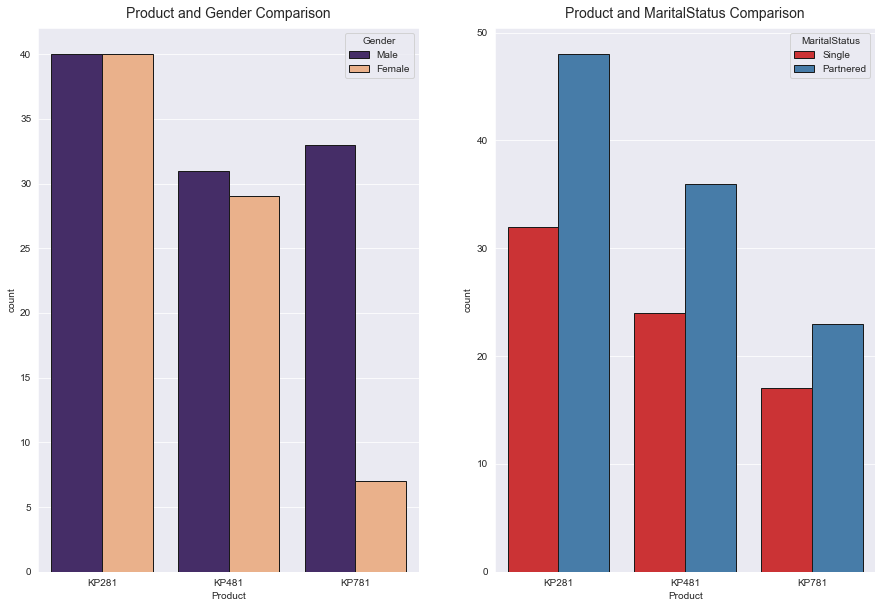

In [46]:
sns.set_style(style='darkgrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.10", palette=['#432371',"#FAAE7B"], ax=axs[0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.1", palette='Set1', ax=axs[1])
axs[0].set_title("Product and Gender Comparison", pad=10, fontsize=14)
axs[1].set_title("Product and MaritalStatus Comparison", pad=10, fontsize=14)
plt.show()

In [47]:
# Finding Probability

### Finding the Probability for using products by single and Married person

In [48]:
    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p_781 = df1['KP781']['Single'] / df1.loc['Single'].sum()
    p_481 = df1['KP481']['Single'] / df1.loc['Single'].sum()
    p_281 = df1['KP281']['Single'] / df1.loc['Single'].sum()
    print(f"Probaility(Single): {df1.loc['Single'].sum()/len(df):.2f}")
    print(f"Probaility(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")
    
    print(f"Probability of product p_781 used by Single: {p_781:.2f}")
    print(f"Probability of product p_481 used by Single): {p_481:.2f}")
    print(f"Probability of product p_281 used by Single): {p_281:.2f}\n")
    
    p_781 = df1['KP781']['Partnered'] / df1.loc['Partnered'].sum()
    p_481 = df1['KP481']['Partnered'] / df1.loc['Partnered'].sum()
    p_281 = df1['KP281']['Partnered'] / df1.loc['Partnered'].sum()

    print(f"Probability of product p_781 used by married person: {p_781:.2f}")
    print(f"Probability of product p_481 used by married person): {p_481:.2f}")
    print(f"Probability of product p_281 used by married person): {p_281:.2f}\n")
    

Probaility(Single): 0.41
Probaility(Partnered): 0.59

Probability of product p_781 used by Single: 0.23
Probability of product p_481 used by Single): 0.33
Probability of product p_281 used by Single): 0.44

Probability of product p_781 used by married person: 0.21
Probability of product p_481 used by married person): 0.34
Probability of product p_281 used by married person): 0.45



### Heatmap showing the correlation between different parameters

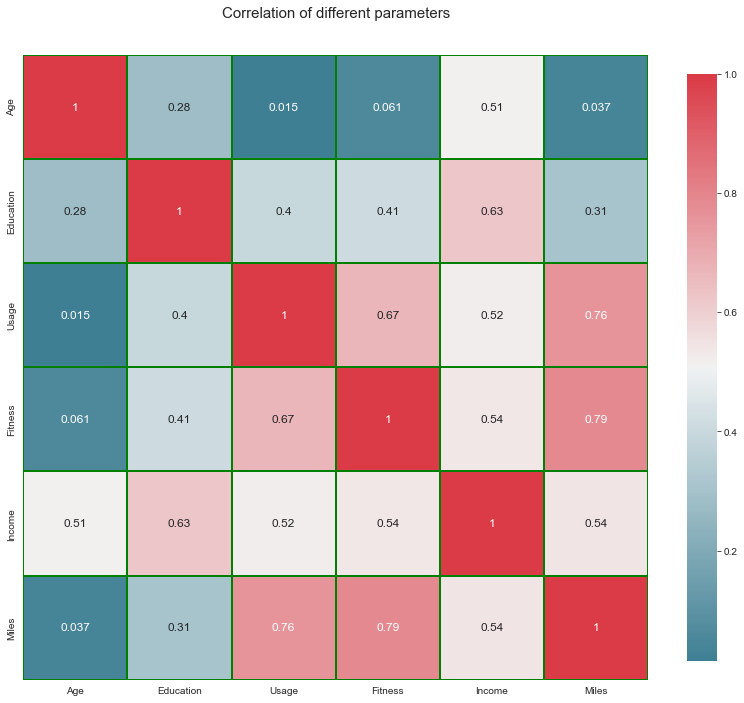

In [49]:
def heatmapp(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='green',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Correlation of different parameters', y=1.05, size=15)

heatmapp(df)

### Business Insights

1. Customers buying products KP281 & KP481 are of same age groups mostly
2. Customers whose age lies between 25-30, are more likely to buy KP781 product
3. Customers whose Education is greater than 16, have more chances to purchase the KP781 product,this depicts Kp781, is mostly choosed product by more incomed person and price is costlier than other two
4. While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481. This depicts that , these products are average priced ones

5. fitness> 3 persons have chances of the customer to purchase the KP781 product.
6.If the customer walk/run greater than 120 Miles, then the customer prefers buying KP781 product.

# Recommendations

1. KP281 is the most frequent brought product, and mostly brought by average salary incomed person, so other products can be launched at this price segment will be most preferable among average salery customers

2. Thare are more Males in the data than Females.And this predicts that, male usage of fitness equipments is more than female. So more fitness equipments can be sold for female customers

3. Customer who is Partnered, is more likely to purchase the product. More Partnered persons are there in the data than single. And the age category for above 20 are likely to keep body fit. So more unisex fitness equipments can be sold

4.Equal number of males and females have purchased KP281 product and Almost same for the product KP481 product too, so unisex fitness equipments are brought more

5. Most of the Male customers have purchased the KP781 product. This shows that the features in KP781 is most liked by male, the same feature can be implemented in other new products going to launch in future.
